GRIP : The Spark Foundation

DATA SCIENCE AND BUSINESS ANALYTICS-INTERNSHIP

By B.Sanjana

TASK 1 : Prediction using Supervised Machine learning

The task is to predict the performance of a student based on the number of his/her study hours using linear regression

Importing the dataset for analysis and prediction

In [ ]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading data from the remote link

In [ ]:
url = "http://bit.ly/w-data"
init_data= pd.read_csv(url)
print("Data imported successfully")


#Displaying first fifteen records of the data
init_data.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [ ]:
#Printing the shape and summary of data
#Printing the shape and summary of data
print("Shape:",init_data.shape)
print("Summary:")
init_data.describe()

Shape: (25, 2)
Summary:


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
print("Information : ",init_data.info)

Information :  <bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>


Data Visualization

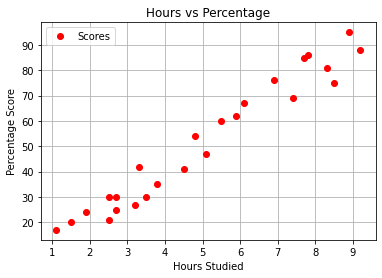

In [ ]:
#Plotting the distribution of scores
init_data.plot(x='Hours', y='Scores', style='o',color='red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

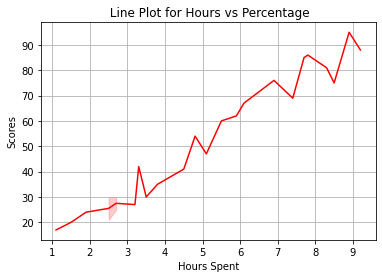

In [ ]:
sns.lineplot(x='Hours',y='Scores',color='red',data=init_data) 
plt.xlabel('Hours Spent')
plt.ylabel('Scores')
plt.title(' Line Plot for Hours vs Percentage')
plt.grid()

From the graph, we can say that there is a linear relationship between "Hours spent" and "Scores". Hence, we can use linear regression supervised ML model to predict results

In [ ]:
init_data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Here we can say that For every 1 hour, the score is 0.98 which means that there is a strong positive correlation between the variables

We understood that with the increase of Hours spent(x axis), there is an increase in the scores(y axis).

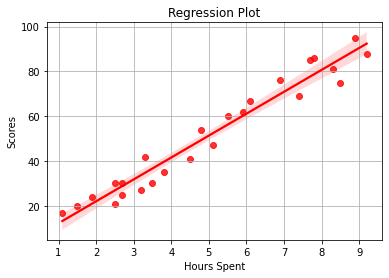

In [ ]:
sns.regplot(x='Hours',y='Scores',color='red',data=init_data)
plt.xlabel('Hours Spent')
plt.ylabel('Scores')
plt.title('Regression Plot')
plt.grid()

Dividing the data

In [ ]:
#dividing the data into "attributes" (inputs) and "labels" (outputs)
X = init_data.iloc[:, :-1].values  
y = init_data.iloc[:, 1].values

In [ ]:
#split this data into training and test sets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

X is the values of "Hours Spent " and Y is the values of "Scores"

This means that data is divided with a portion of 75% training data and 25% testing data

Random state=0 means that data will be picked randomly from the dataset

Data Training

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


Model Visualization

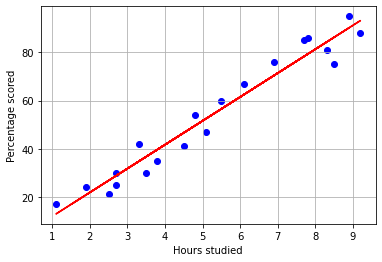

In [ ]:
# Plotting the regression line on training data

#the line equation is in the form of Y=mX+c
line = regressor.coef_*X+regressor.intercept_ 

# Plotting for the test data
plt.scatter(X_train, y_train,color='blue')
plt.plot(X, line,color='red');
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.grid()

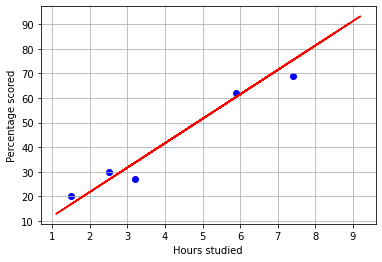

In [ ]:
# Plotting the regression line on test data

line = regressor.coef_*X+regressor.intercept_ #the line equation is in the form of Y=mX+c

# Plotting for the test data
plt.scatter(X_test, y_test,color='blue')
plt.plot(X, line,color='red');
plt.xlabel("Hours studied")
plt.ylabel("Percentage scored")
plt.grid()

Applying predictions

In [ ]:
#prediction
print('Predictions')

print(X_test) # Testing data - In Hours

y_pred = regressor.predict(X_test) # Predicting the scores

print(y_pred)
print(y_test)

Predictions
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]
[20 27 69 30 62]


In [ ]:
#Printing the testing data (Scores)
y_test

array([20, 27, 69, 30, 62])

In [ ]:
#Printing the predicted data (Scores)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


Applying Prediction Model using 9.25 hours/day

In [ ]:
# Predicting the given data
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format([[hours]]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


Model Evaluation

In conclusion, we will evaluate our model using mean absolute error

In [23]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
